# PageRank and HITS using networkx

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
#Preferential attachment model
#n=Number of nodes
#m=Number of edges to attach from a new node to existing nodes
G=nx.barabasi_albert_graph(100,8)

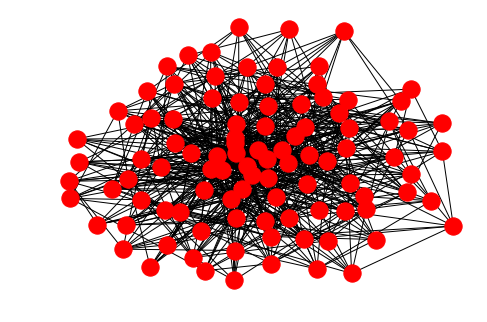

In [19]:
nx.draw(G)
plt.figure()
plt.show()

In [26]:
G.number_of_edges()

736

In [27]:
G.number_of_nodes()

100

In [28]:
pr=nx.pagerank(G,0.8)

In [29]:
pr

{0: 0.01111332023661264,
 1: 0.008764546891634929,
 2: 0.011410181936798026,
 3: 0.011117920523935568,
 4: 0.014547500588712445,
 5: 0.0067719928384751705,
 6: 0.01333553513292017,
 7: 0.011375873840048893,
 8: 0.02841086088313456,
 9: 0.021710653643103126,
 10: 0.024413398877756738,
 11: 0.019189981202422646,
 12: 0.023625352222588523,
 13: 0.0198791224660338,
 14: 0.015196923638518793,
 15: 0.01568100528009271,
 16: 0.019509677359811625,
 17: 0.011739657156770389,
 18: 0.018022383017276353,
 19: 0.01352360295987689,
 20: 0.016237243118801595,
 21: 0.011108906249808474,
 22: 0.014116921541166071,
 23: 0.013425853098021707,
 24: 0.009750585016135935,
 25: 0.014665323966133643,
 26: 0.01007715870167588,
 27: 0.009863473783686124,
 28: 0.011262899579037366,
 29: 0.012359748179802283,
 30: 0.012022645307933974,
 31: 0.009669604032329198,
 32: 0.010722844261303922,
 33: 0.010195445106322967,
 34: 0.010288477016661652,
 35: 0.011955720899106974,
 36: 0.012624665672559529,
 37: 0.01257257776

In [30]:
nx.hits(G)

({0: 0.012994670785649755,
  1: 0.011173570724279639,
  2: 0.010622626550539334,
  3: 0.012774203265960283,
  4: 0.019852055590968205,
  5: 0.007515893746711067,
  6: 0.015213101116190996,
  7: 0.011127475496796716,
  8: 0.029879206647210506,
  9: 0.023711751313592974,
  10: 0.02688338656304938,
  11: 0.02345124490617398,
  12: 0.0270267959053909,
  13: 0.023123473435343628,
  14: 0.01903779632331233,
  15: 0.01682120675551257,
  16: 0.021140067185044433,
  17: 0.013316738489277847,
  18: 0.01984229949720564,
  19: 0.013204599113559881,
  20: 0.017277260196584925,
  21: 0.01294409073378891,
  22: 0.01368856321715109,
  23: 0.01422876638646064,
  24: 0.013046537618897739,
  25: 0.014032139010305998,
  26: 0.010848995057169682,
  27: 0.011122672744249877,
  28: 0.011418527029801978,
  29: 0.01263563364970211,
  30: 0.01187883317035716,
  31: 0.008708374343863075,
  32: 0.01122780105742338,
  33: 0.009260226245115168,
  34: 0.009234029975354685,
  35: 0.010464557242318118,
  36: 0.0113054

# PageRank from scratch

In [32]:
def pagerank(graph, damping=0.85, epsilon=1.0e-8):
    inlink_map = {}
    outlink_counts = {}
    
    def new_node(node):
        if node not in inlink_map: inlink_map[node] = set()
        if node not in outlink_counts: outlink_counts[node] = 0
    
    for tail_node, head_node in graph:
        new_node(tail_node)
        new_node(head_node)
        if tail_node == head_node: continue
        
        if tail_node not in inlink_map[head_node]:
            inlink_map[head_node].add(tail_node)
            outlink_counts[tail_node] += 1
    
    all_nodes = set(inlink_map.keys())
    for node, outlink_count in outlink_counts.items():
        if outlink_count == 0:
            outlink_counts[node] = len(all_nodes)
            for l_node in all_nodes: inlink_map[l_node].add(node)
    
    initial_value = 1 / len(all_nodes)
    ranks = {}
    for node in inlink_map.keys(): ranks[node] = initial_value
    
    new_ranks = {}
    delta = 1.0
    n_iterations = 0
    while delta > epsilon:
        new_ranks = {}
        for node, inlinks in inlink_map.items():
            new_ranks[node] = ((1 - damping) / len(all_nodes)) + (damping * sum(ranks[inlink] / outlink_counts[inlink] for inlink in inlinks))
        delta = sum(abs(new_ranks[node] - ranks[node]) for node in new_ranks.keys())
        ranks, new_ranks = new_ranks, ranks
        n_iterations += 1
    
    return ranks, n_iterations

In [31]:
graph=[(1,2),(2,3),(1,3)]

In [33]:
pagerank(graph)

({1: 0.19757964896759087, 2: 0.28155100077907663, 3: 0.5208693502533326}, 18)

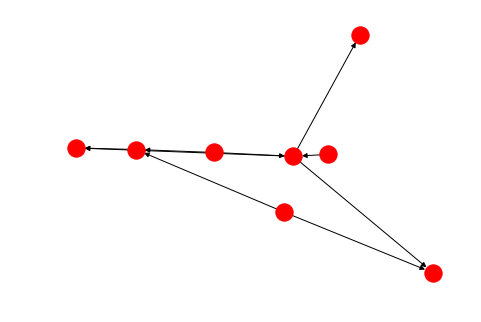

In [46]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()
graph=[('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')]
G.add_edges_from(graph)

nx.draw(G)
plt.show()

In [47]:
pagerank(graph)

({'A': 0.07114273030210597,
  'B': 0.16184971071163134,
  'C': 0.1316140505751229,
  'D': 0.07114273030210597,
  'E': 0.07114273030210597,
  'F': 0.14723580843990025,
  'G': 0.2288720910636357,
  'H': 0.11700014830339178},
 26)